In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import metrics

boston = load_boston()  # 共506条数据
X = boston.data
y = boston.target

In [ ]:
from sklearn.preprocessing import StandardScaler
 
#标准化，返回值为标准化后的数据
StandardScaler().fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 
#区间缩放，返回值为缩放到[0, 1]区间的数据
MinMaxScaler().fit_transform(X)

In [ ]:
from sklearn.preprocessing import Normalizer

#归一化，返回值为归一化后的数据
Normalizer().fit_transform(X)

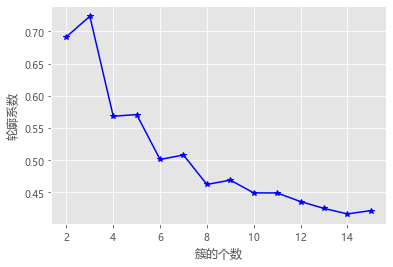

In [2]:
# 构造自定义函数，用于绘制不同k值和对应轮廓系数的折线图
def k_silhouette(X, clusters):
    K = range(2,clusters+1)
    # 构建空列表，用于存储个中簇数下的轮廓系数
    S = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        # 调用字模块metrics中的silhouette_score函数，计算轮廓系数
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 设置绘图风格
    plt.style.use('ggplot')    
    # 绘制K的个数与轮廓系数的关系
    plt.plot(K, S, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('轮廓系数')
    # 显示图形
    plt.show()
    
# 自定义函数的调用
k_silhouette(X, 15)

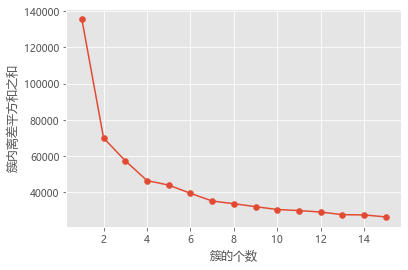

In [7]:
distance = []
k = []
#簇的数量
for n_clusters in range(1,16):
    cls = KMeans(n_clusters).fit(X)

    #曼哈顿距离
    def manhattan_distance(x,y):
        return np.sum(abs(x-y))

    distance_sum = 0
    for i in range(n_clusters):
        group = cls.labels_ == i
        members = X[group,:]
        for v in members:
            distance_sum += manhattan_distance(np.array(v), cls.cluster_centers_[i])
    distance.append(distance_sum)
    k.append(n_clusters)
plt.scatter(k, distance)
plt.plot(k, distance)
plt.xlabel("簇的个数")
plt.ylabel("簇内离差平方和之和")
plt.show()

In [8]:
# 构建Kmeans模型
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
# 聚类结果标签
boston['kmeans_label'] = kmeans.labels_

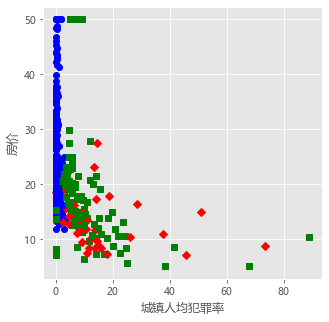

In [9]:
plt.figure(figsize=(5,5)) 
colors = ['b', 'g', 'r'] 
markers = ['o', 's', 'D']
for i,l in enumerate(kmeans.labels_): 
     plt.plot(X[i][0],y[i],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("城镇人均犯罪率")
plt.ylabel("房价")
plt.show()

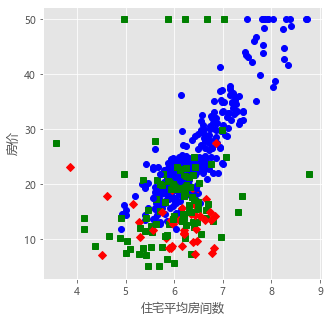

In [10]:
plt.figure(figsize=(5,5)) 
colors = ['b', 'g', 'r'] 
markers = ['o', 's', 'D']
for i,l in enumerate(kmeans.labels_): 
     plt.plot(X[i][5],y[i],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("住宅平均房间数")
plt.ylabel("房价")
plt.show()

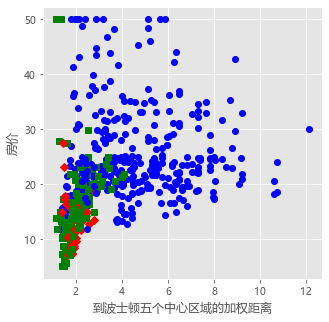

In [11]:
plt.figure(figsize=(5,5)) 
colors = ['b', 'g', 'r'] 
markers = ['o', 's', 'D']
for i,l in enumerate(kmeans.labels_): 
     plt.plot(X[i][7],y[i],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("到波士顿五个中心区域的加权距离")
plt.ylabel("房价")
plt.show()

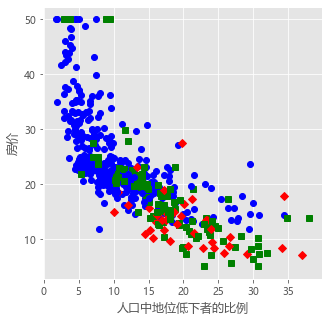

In [12]:
plt.figure(figsize=(5,5)) 
colors = ['b', 'g', 'r'] 
markers = ['o', 's', 'D']
for i,l in enumerate(kmeans.labels_): 
     plt.plot(X[i][12],y[i],color=colors[l],marker=markers[l],ls='None') 
plt.xlabel("人口中地位低下者的比例")
plt.ylabel("房价")
plt.show()